# [월간 데이콘 심리 성향 예측 AI 경진대회](https://dacon.io/competitions/official/235647/data)

## [데이터 변수 설명](https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub)

## [[코드] EDA를 곁들인 베이스라인](https://dacon.io/competitions/official/235647/codeshare/1700?page=1&dtype=recent)

# import

In [1]:
# 환경
import platform
env = platform.uname().system

workdir_path = r"."
data_path = fr"{workdir_path}/data"
if env == "Windows":
    env = env
    # if platform.uname().node == '':

elif env == "Linux":
    import sys

    if 'google.colab' in sys.modules:
        env = "Google Colab"

        from google.colab import drive
        drive.mount('/gdrive', force_remount=True)

        workdir_path = r"/gdrive/MyDrive/[2022_0914~2023_0113]    Likelion AI School 7/_1_corazzon - Data Analytics with Python/_project/Monthly Daycon Psychological Prediction AI Competition"
        data_path = fr"{workdir_path}/data"

print(env)
print(data_path)

Mounted at /gdrive
Google Colab
/gdrive/MyDrive/[2022_0914~2023_0113]    Likelion AI School 7/_1_corazzon - Data Analytics with Python/_project/Monthly Daycon Psychological Prediction AI Competition/data


In [2]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)



def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data 불러오기

In [3]:
file_train = "train.csv"
file_test = "test_x.csv"
file_sample_submission = "sample_submission.csv"

train = reduce_mem_usage(pd.read_csv(fr"{data_path}/{file_train}", index_col=0))
display(train.head())

test = reduce_mem_usage(pd.read_csv(fr"{data_path}/{file_test}", index_col=0))
display(test.head())

submission = reduce_mem_usage(pd.read_csv(fr"{data_path}/{file_sample_submission}", index_col=0))
display(submission.head())

print(train.shape, test.shape, submission.shape)
print(set(train.columns) - set(test.columns))

Mem. usage decreased to  8.68 Mb (67.9% reduction)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0000,363,4.0000,1370,5.0000,997,1.0000,1024,2.0000,1577,5.0000,539,2.0000,586,4.0000,1095,5.0000,1142,4.0000,1287,4.0000,883,4.0000,851,2.0000,851,5.0000,816,2.0000,579,2.0000,924,2.0000,366,2.0000,876,2.0000,633,1.0000,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0000,647,5.0000,1313,3.0000,3387,5.0000,2969,1.0000,4320,3.0000,2190,1.0000,826,1.0000,4082,5.0000,1867,3.0000,1264,5.0000,2943,4.0000,3927,1.0000,4329,5.0000,1828,1.0000,1214,5.0000,2414,5.0000,1356,1.0000,3039,4.0000,4304,1.0000,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0000,1623,1.0000,1480,1.0000,1021,4.0000,3374,5.0000,1333,1.0000,531,4.0000,1167,1.0000,1016,3.0000,2653,2.0000,1569,5.0000,998,5.0000,2547,2.0000,918,4.0000,2153,2.0000,1304,1.0000,1131,5.0000,937,4.0000,1327,1.0000,1170,1.0000,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0000,504,3.0000,2311,4.0000,992,3.0000,3245,1.0000,357,2.0000,1519,4.0000,159,3.0000,2275,5.0000,2809,4.0000,5614,3.0000,3219,4.0000,1296,4.0000,9046,4.0000,1216,4.0000,1169,4.0000,23868,3.0000,581,4.0000,8830,4.0000,2392,5.0000,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0000,927,1.0000,707,5.0000,556,2.0000,1062,1.0000,1014,2.0000,628,1.0000,991,1.0000,1259,5.0000,1153,5.0000,1388,5.0000,740,5.0000,1181,4.0000,547,2.0000,575,1.0000,754,4.0000,1140,5.0000,323,5.0000,1070,1.0000,583,2.0000,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


Mem. usage decreased to  2.08 Mb (68.8% reduction)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0000,736,2.0000,2941,3.0000,4621,1.0000,4857,2.0000,2550,4.0000,3171,5.0000,3613,2.0000,1494,4.0000,1597,2.0000,8891,5.0000,2416,3.0000,2043,3.0000,3445,5.0000,1232,3.0000,1152,4.0000,1447,3.0000,798,4.0000,1054,1.0000,3462,2.0000,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,3.0000,514,2.0000,1952,3.0000,1552,3.0000,821,4.0000,1150,1.0000,605,2.0000,601,1.0000,2370,5.0000,2268,3.0000,1759,5.0000,771,5.0000,1124,3.0000,4525,1.0000,559,2.0000,988,3.0000,1014,4.0000,380,5.0000,995,3.0000,629,4.0000,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0000,500,2.0000,2507,4.0000,480,2.0000,614,2.0000,1326,2.0000,767,1.0000,799,1.0000,1309,2.0000,3317,4.0000,766,4.0000,1940,5.0000,926,4.0000,568,2.0000,608,5.0000,669,3.0000,2417,3.0000,710,4.0000,2781,3.0000,1110,5.0000,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1.0000,669,1.0000,1050,5.0000,1435,2.0000,2252,5.0000,2533,1.0000,578,1.0000,742,1.0000,2886,1.0000,1379,1.0000,1392,3.0000,2855,5.0000,697,4.0000,573,1.0000,412,2.0000,1076,4.0000,1445,5.0000,1069,1.0000,847,4.0000,1126,1.0000,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.0000,499,1.0000,1243,5.0000,845,2.0000,1666,2.0000,925,2.0000,413,5.0000,361,1.0000,995,2.0000,1427,3.0000,1093,5.0000,1201,4.0000,1264,2.0000,943,4.0000,475,2.0000,787,4.0000,607,3.0000,529,4.0000,947,4.0000,524,3.0000,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


Mem. usage decreased to  0.10 Mb (43.8% reduction)


,voted
index,
0,0
1,0
2,0
3,0
4,0


(45532, 77) (11383, 76) (11383, 1)
{'voted'}


In [4]:
label = "voted"

# Data 탐색

In [5]:
display(train.info())

display(train.describe().T)

display(train.describe(include="O").T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float16
 1   QaE         45532 non-null  int32  
 2   QbA         45532 non-null  float16
 3   QbE         45532 non-null  int32  
 4   QcA         45532 non-null  float16
 5   QcE         45532 non-null  int32  
 6   QdA         45532 non-null  float16
 7   QdE         45532 non-null  int32  
 8   QeA         45532 non-null  float16
 9   QeE         45532 non-null  int32  
 10  QfA         45532 non-null  float16
 11  QfE         45532 non-null  int32  
 12  QgA         45532 non-null  float16
 13  QgE         45532 non-null  int32  
 14  QhA         45532 non-null  float16
 15  QhE         45532 non-null  int32  
 16  QiA         45532 non-null  float16
 17  QiE         45532 non-null  int32  
 18  QjA         45532 non-null  float16
 19  QjE         45532 non-nul

None

,count,mean,std,min,25%,50%,75%,max
QaA,45532.0000,inf,1.1973,1.0000,1.0000,2.0000,3.0000,5.0000
QaE,45532.0000,945.3570,13075.6481,25.0000,404.0000,557.0000,827.0000,2413960.0000
QbA,45532.0000,inf,1.5664,1.0000,1.0000,3.0000,4.0000,5.0000
QbE,45532.0000,2189.5886,33510.2659,25.0000,875.0000,1218.0000,1838.0000,5580395.0000
QcA,45532.0000,inf,1.4316,1.0000,2.0000,4.0000,5.0000,5.0000
QcE,45532.0000,1484.2945,8977.6643,25.0000,651.0000,899.0000,1335.0000,871557.0000
QdA,45532.0000,inf,1.0439,1.0000,1.0000,1.0000,2.0000,5.0000
QdE,45532.0000,1490.6722,10922.6009,26.0000,679.0000,931.0000,1355.0000,1552821.0000
QeA,45532.0000,inf,1.3691,1.0000,1.0000,2.0000,3.0000,5.0000
QeE,45532.0000,1899.2923,16707.6542,25.0000,834.0000,1154.0000,1656.0000,1919926.0000


,count,unique,top,freq
age_group,45532,7,10s,14215
gender,45532,2,Male,24217
race,45532,7,White,31248
religion,45532,12,Atheist,10192


In [6]:
# train.hist(figsize = (40,40), bins = 30)

# 전처리

In [7]:
temp = train.select_dtypes('number').columns.to_list()
for i in temp:
    try:
        train[i] = train[i].astype(int)
        test[i] = test[i].astype(int)
    except:
        pass
reduce_mem_usage(train)
reduce_mem_usage(test)
display(train.info())
display(test.info())

Mem. usage decreased to  7.82 Mb (71.2% reduction)
Mem. usage decreased to  1.87 Mb (72.1% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   QaA         45532 non-null  int8  
 1   QaE         45532 non-null  int32 
 2   QbA         45532 non-null  int8  
 3   QbE         45532 non-null  int32 
 4   QcA         45532 non-null  int8  
 5   QcE         45532 non-null  int32 
 6   QdA         45532 non-null  int8  
 7   QdE         45532 non-null  int32 
 8   QeA         45532 non-null  int8  
 9   QeE         45532 non-null  int32 
 10  QfA         45532 non-null  int8  
 11  QfE         45532 non-null  int32 
 12  QgA         45532 non-null  int8  
 13  QgE         45532 non-null  int32 
 14  QhA         45532 non-null  int8  
 15  QhE         45532 non-null  int32 
 16  QiA         45532 non-null  int8  
 17  QiE         45532 non-nu

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11383 entries, 0 to 11382
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   QaA         11383 non-null  int8  
 1   QaE         11383 non-null  int32 
 2   QbA         11383 non-null  int8  
 3   QbE         11383 non-null  int32 
 4   QcA         11383 non-null  int8  
 5   QcE         11383 non-null  int32 
 6   QdA         11383 non-null  int8  
 7   QdE         11383 non-null  int32 
 8   QeA         11383 non-null  int8  
 9   QeE         11383 non-null  int32 
 10  QfA         11383 non-null  int8  
 11  QfE         11383 non-null  int32 
 12  QgA         11383 non-null  int8  
 13  QgE         11383 non-null  int32 
 14  QhA         11383 non-null  int8  
 15  QhE         11383 non-null  int32 
 16  QiA         11383 non-null  int8  
 17  QiE         11383 non-null  int32 
 18  QjA         11383 non-null  int8  
 19  QjE         11383 non-null  int32 
 20  QkA   

None

## 결측치

In [8]:
temp = pd.DataFrame(train.isnull().sum())
display(temp[temp[0]>=1])

temp = pd.DataFrame(test.isnull().sum())
display(temp[temp[0]>=1])

,0


,0


# corr

<ipython-input-9-071b89a31118>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))


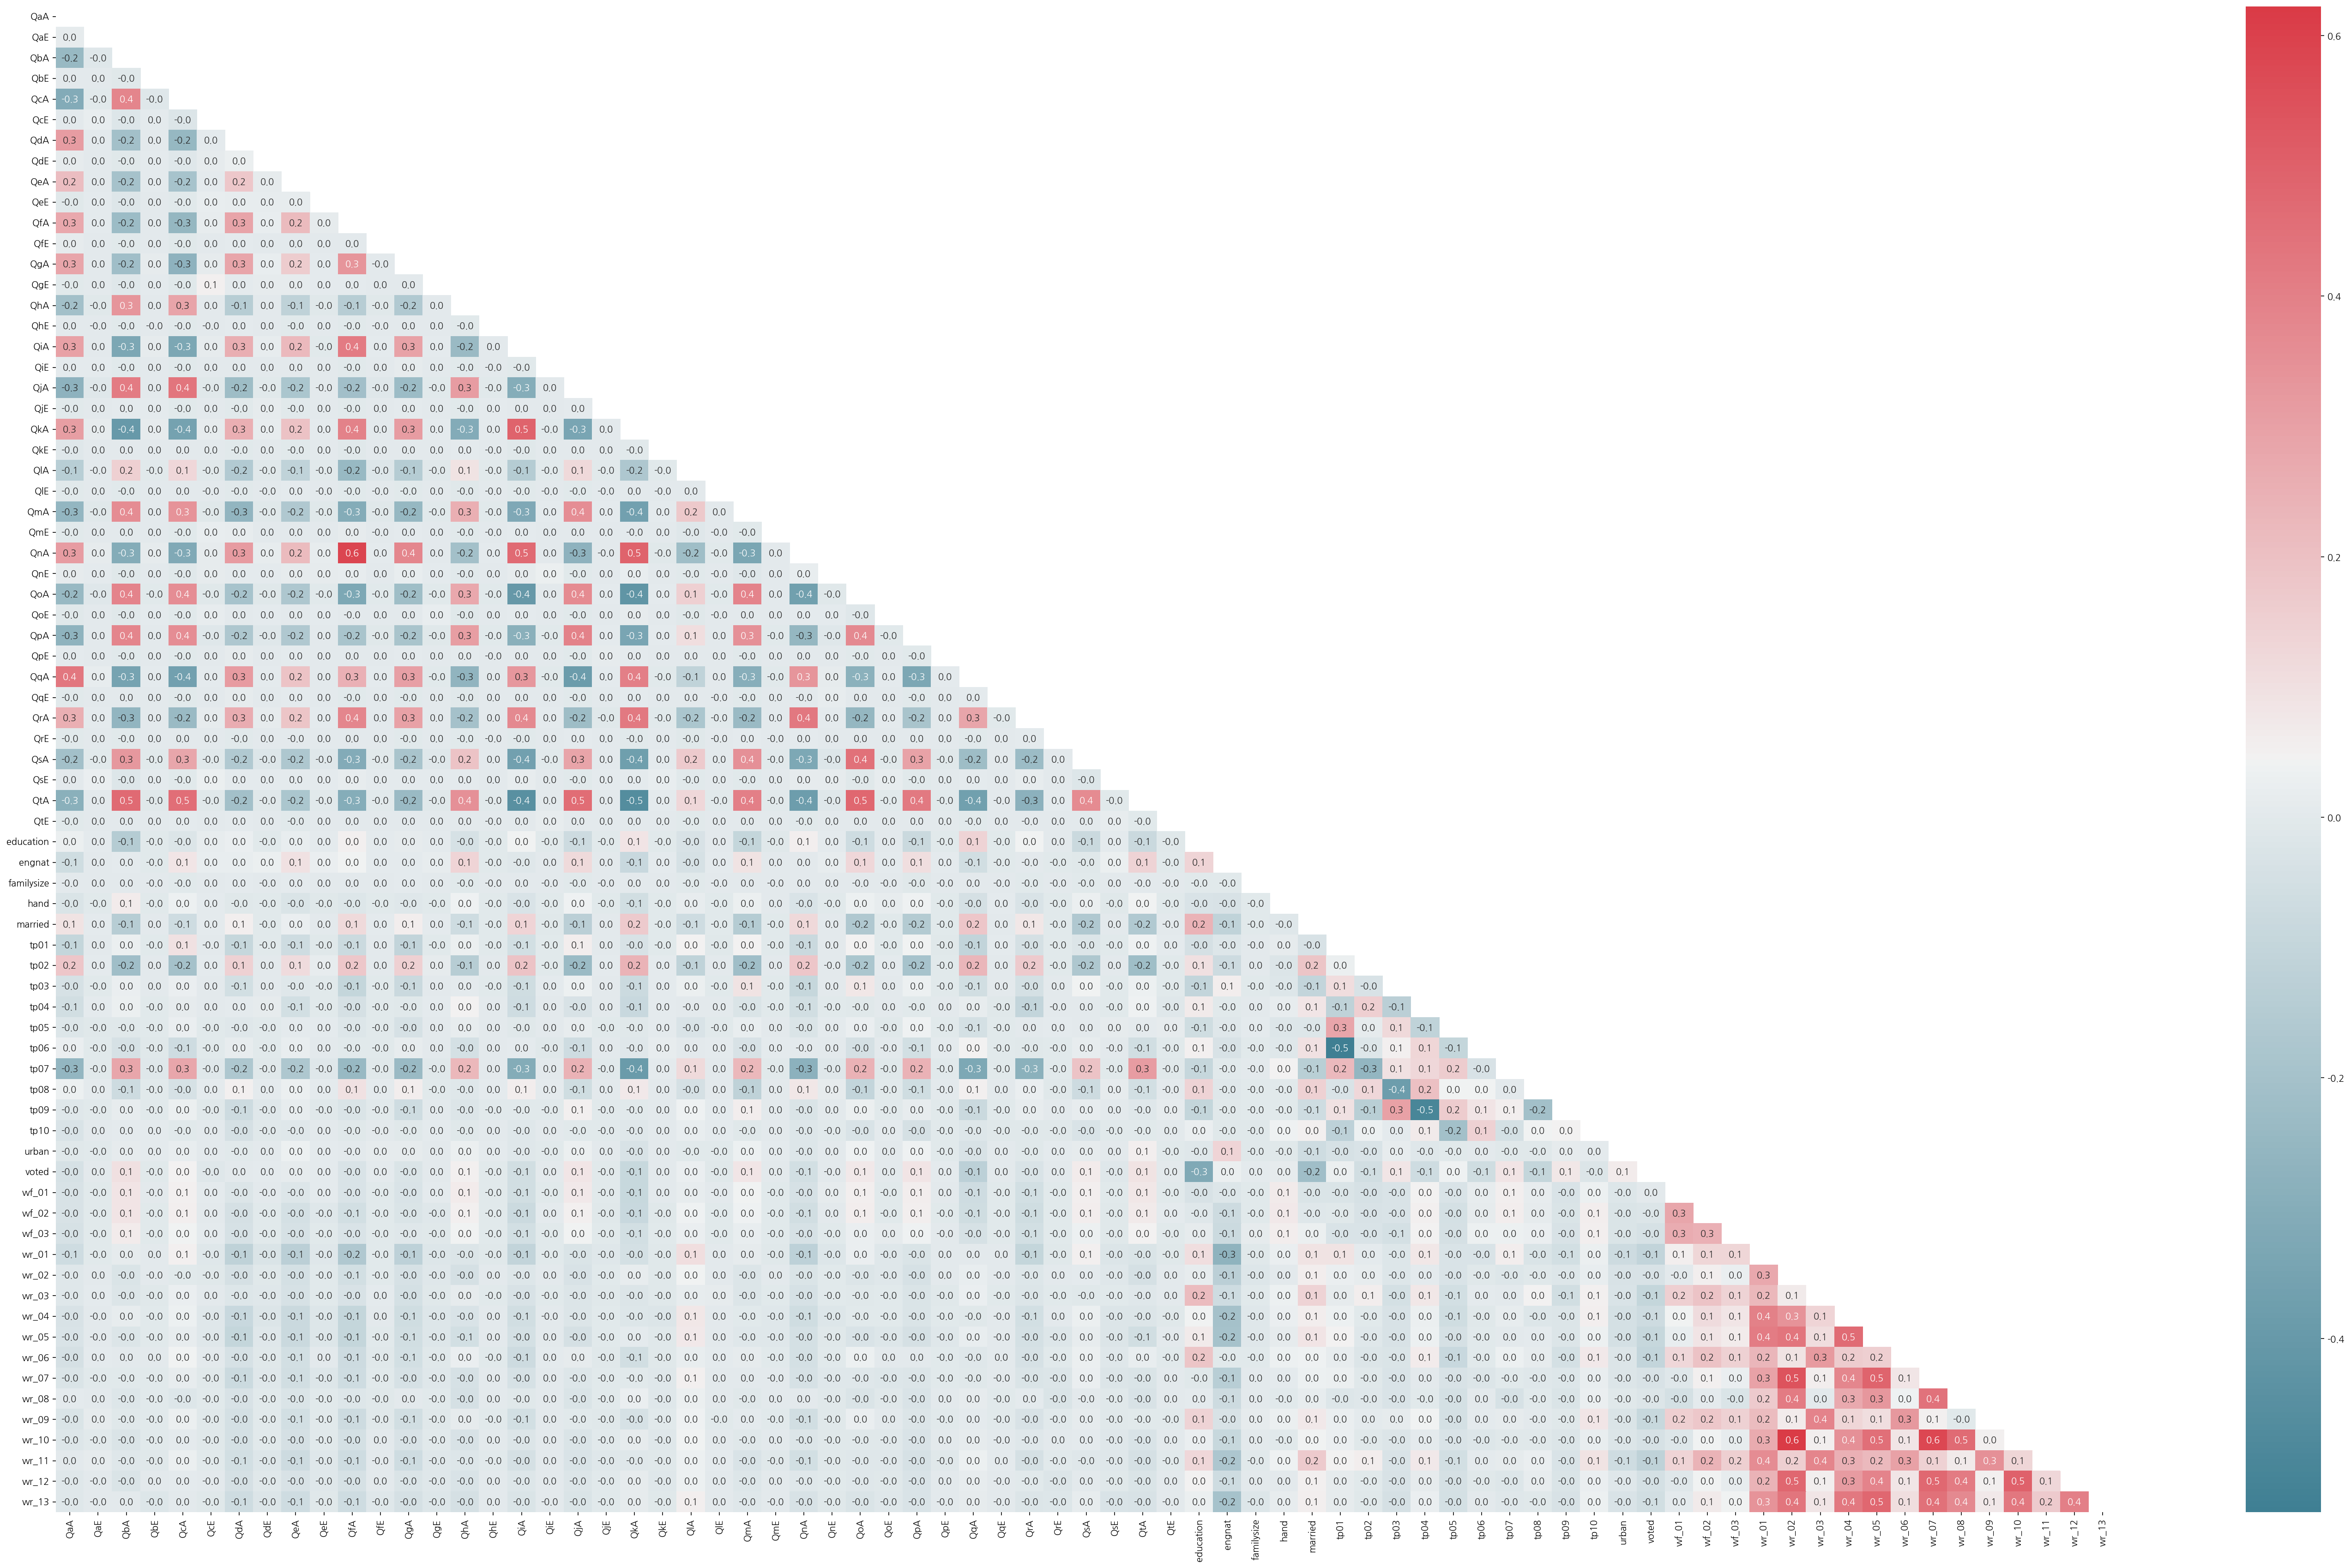

In [9]:
plt.figure(figsize = (50, 30))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = train.corr(), annot = True, fmt = '.1f', mask = mask, cmap = colormap)

In [10]:
corr = pd.DataFrame(train.drop(columns = label).corrwith(train[label]))
corr_sort_abs = corr.sort_values(by=0, ascending=False, key=abs)
display(corr_sort_abs)

,0
education,-0.3199
married,-0.2145
QqA,-0.1233
wr_11,-0.1167
wr_01,-0.1079
wr_06,-0.1025
tp08,-0.0994
QbA,0.0992
wr_03,-0.0978
wr_05,-0.0941


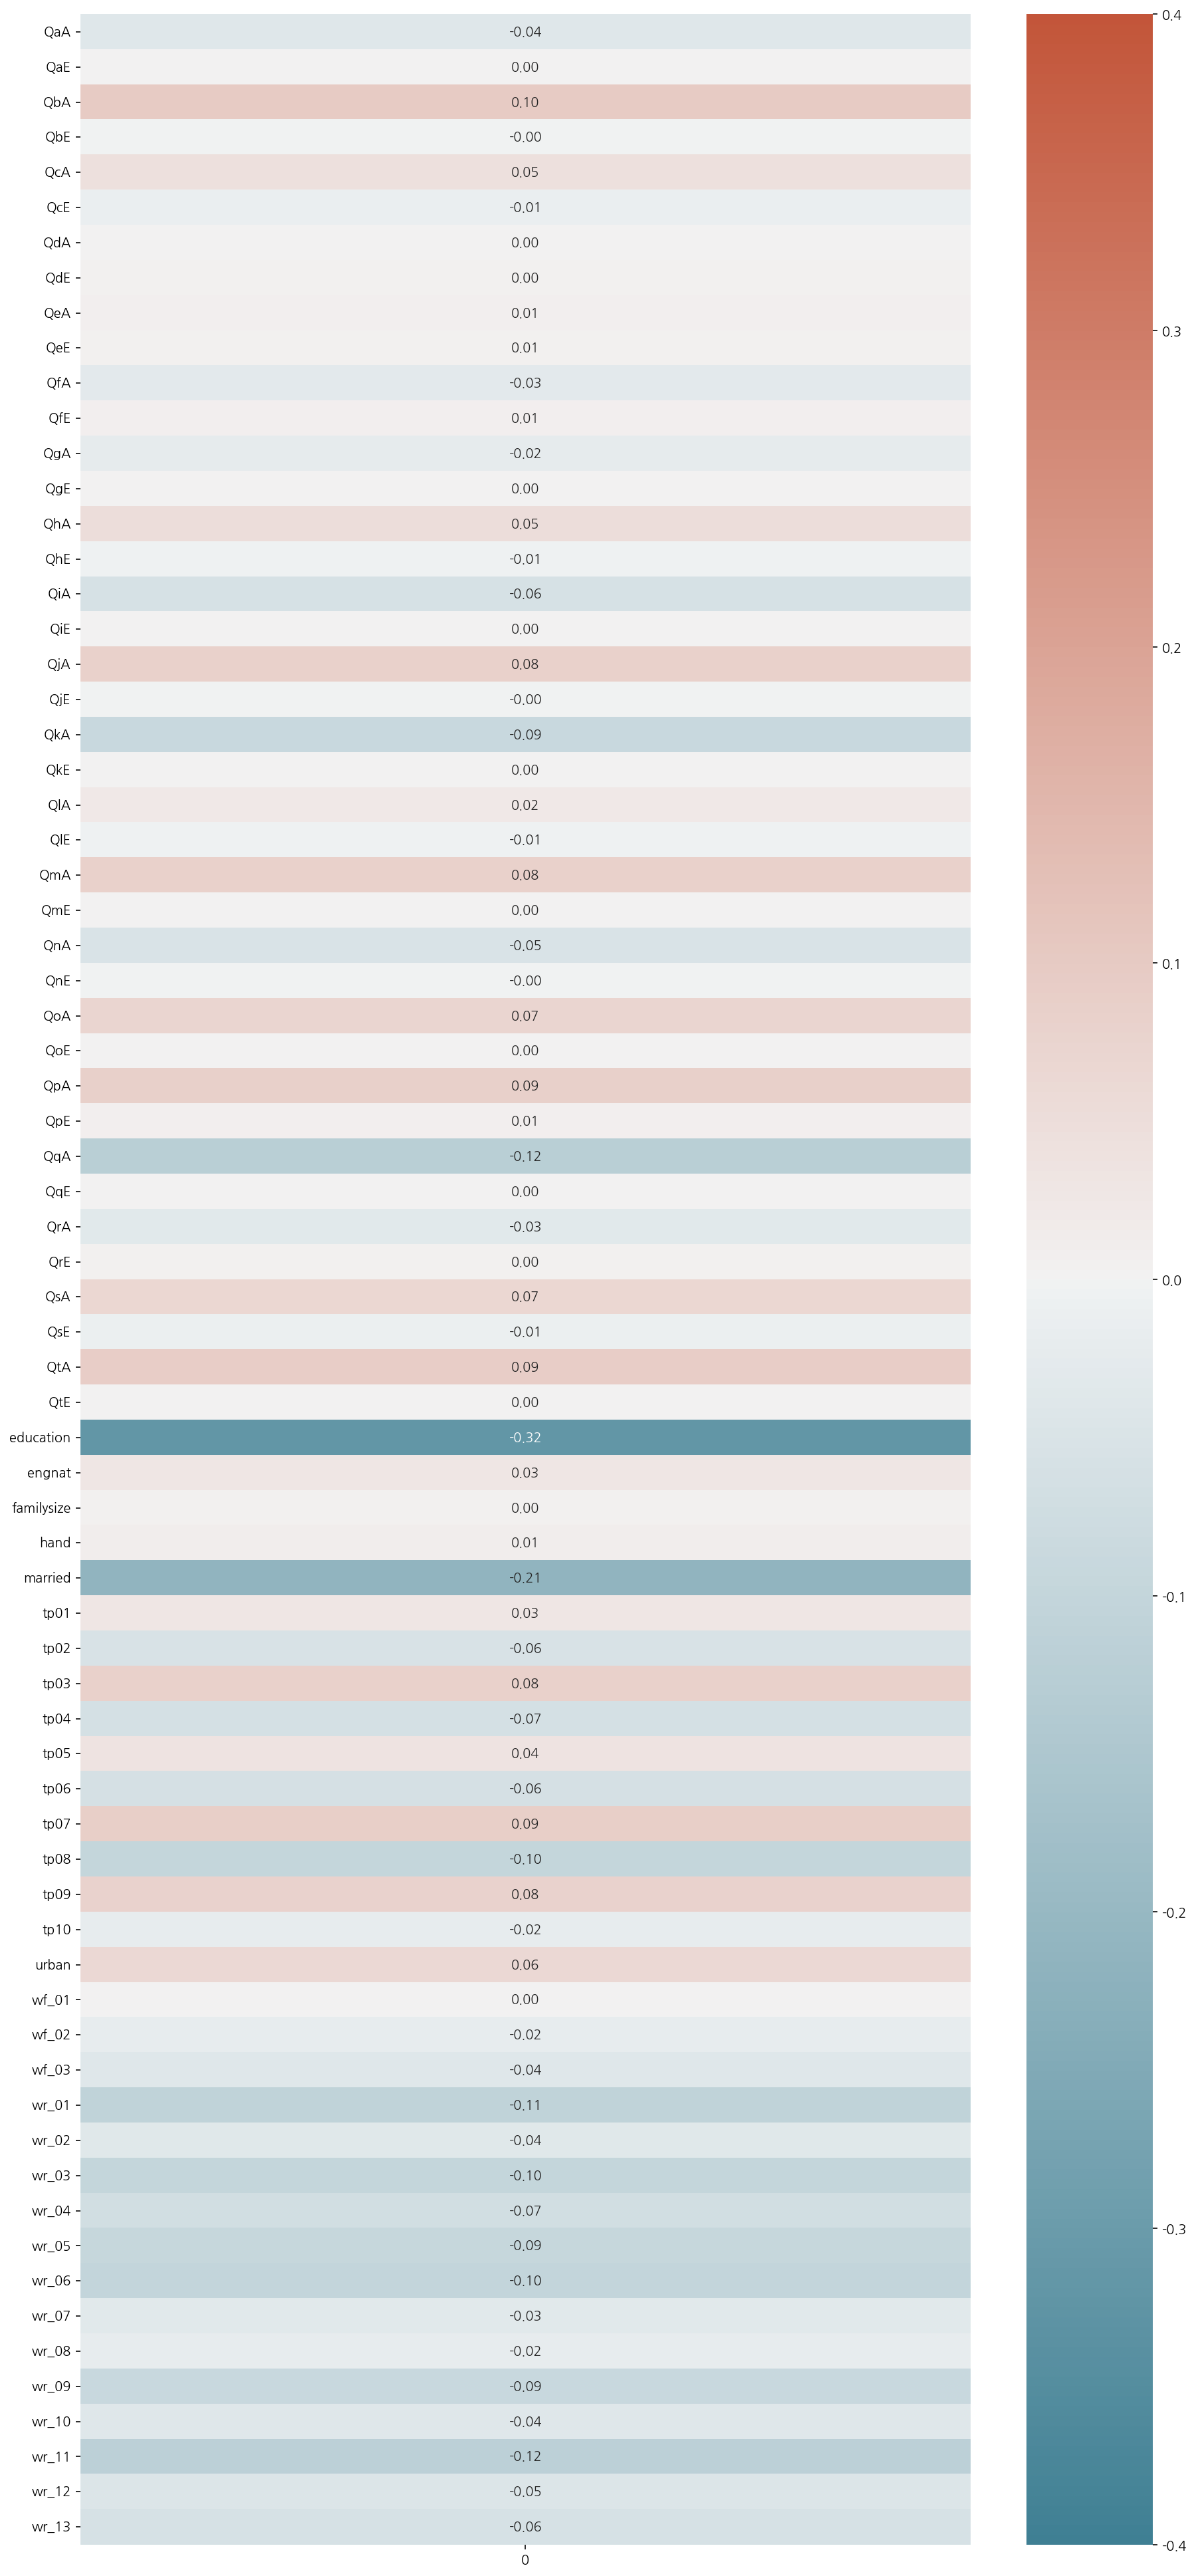

In [11]:
plt.figure(figsize = (15, 35))
cmap = sns.diverging_palette(220, 20, as_cmap=True, center="light")

sns.heatmap(data = corr, annot = True, fmt = '.2f', cmap = cmap, vmin=-0.4, vmax=0.4)

# 변수


## 변수 선정
Q_E(a~t) : 질문을 답할 때까지의 시간

상관관계도 낮고, 중요한 변수로 생각되지 않으므로 드랍.

In [12]:
# drop_col = [i for i in train.columns.to_list() if "E" in i]
# train = train.drop(drop_col, axis = 1)
# test = test.drop(drop_col, axis = 1)
# print(train.columns.to_list())
# print(test.columns.to_list())

## **인코딩**

In [13]:
train["voted"] = train["voted"].map(lambda x:x-1)

In [14]:
# from sklearn.preprocessing import LabelEncoder
# lbe = LabelEncoder()
# train['gender'] = lbe.fit_transform(train['gender'])
# train['age_group'] = lbe.fit_transform(train['age_group'])
# train['race'] = lbe.fit_transform(train['race'])
# train['religion'] = lbe.fit_transform(train['religion'])

# test['gender'] = lbe.fit_transform(test['gender'])
# test['age_group'] = lbe.fit_transform(test['age_group'])
# test['race'] = lbe.fit_transform(test['race'])
# test['religion'] = lbe.fit_transform(test['religion'])

# train[["gender", "age_group", "race", "religion"]].head()

In [15]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.shape
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,...,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,363,4,1370,5,997,1,1024,2,1577,5,539,2,586,4,1095,5,1142,4,1287,4,883,4,851,2,851,5,816,2,579,2,924,2,366,2,876,2,633,1,1115,2,1,4,1,3,2,2,2,1,2,...,7,4,4,3,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,5,647,5,1313,3,3387,5,2969,1,4320,3,2190,1,826,1,4082,5,1867,3,1264,5,2943,4,3927,1,4329,5,1828,1,1214,5,2414,5,1356,1,3039,4,4304,1,1346,4,2,3,1,1,1,1,0,0,1,...,3,4,0,4,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,1623,1,1480,1,1021,4,3374,5,1333,1,531,4,1167,1,1016,3,2653,2,1569,5,998,5,2547,2,918,4,2153,2,1304,1,1131,5,937,4,1327,1,1170,1,1409,3,1,3,1,2,2,3,1,5,3,...,2,6,1,3,2,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,504,3,2311,4,992,3,3245,1,357,2,1519,4,159,3,2275,5,2809,4,5614,3,3219,4,1296,4,9046,4,1216,4,1169,4,23868,3,581,4,8830,4,2392,5,1312,4,2,0,1,1,2,4,1,1,1,...,1,3,1,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,927,1,707,5,556,2,1062,1,1014,2,628,1,991,1,1259,5,1153,5,1388,5,740,5,1181,4,547,2,575,1,754,4,1140,5,323,5,1070,1,583,2,1889,3,1,2,1,2,1,1,1,6,0,...,0,6,2,6,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


# DL

## DataSet

In [16]:
features = train.columns.tolist()
features.remove(label)
if label in features:
    print("label in feature is Ture")
else:
    print(label)
    print(features)

voted
['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'age_group_+70s', 'age_group_10s', 'age_group_20s', 'age_group_30s', 'age_group_40s', 'age_group_50s', 'age_group_60s', 'gender_Female', 'gender_Male', 'race_Arab', 'race_Asian', 'race_Black', 'race_Indigenous Australian', 'race_Native American', 'race_Other', 'race_White', 'religion_Agnostic', 'religion_Atheist', 'religion_Buddhist', 'religion_Christian_Catholic', 'religion_Christian_Mormon', 'religion_Christian_Other',

In [17]:
X_test = test[features]

# X, y 만들기
X = train[features]
y = train[label]
X.shape, y.shape

((45532, 100), (45532,))

In [18]:
# sklearn.model_selection 으로 데이터셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40978, 100), (4554, 100), (40978,), (4554,))

## Model

In [19]:
# dir(tf.keras.activations)

In [20]:
# 입력데이터 수 구하기
input_shape = X.shape[1]
input_shape

100

In [21]:
# tf.keras.models.Sequential 로 입력-히든-출력(sigmoid) 레이어로 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,  activation = "sigmoid"),
    ])
model

In [22]:
dir(tf.keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

In [23]:
# 모델 컴파일
metrics = ['AUC', 'accuracy']
# metrics = ['binary_crossentropy', 'accuracy']
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=metrics)

In [24]:
# 모델 요약
# 컴파일을 여러번 하면 sequential 뒤에 번호가 생기고 잘못실습한게 아니니 걱정안해도 됩니다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-traina

## 학습

In [25]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈추개 합니다.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [27]:
# 학습하기
# callbacks=[early_stop, PrintDot()]
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[PrintDot(), early_stop], verbose=0)


.....................

In [28]:
# 학습결과의 history 값을 가져와서 비교하기 위해 데이터프레임으로 변환
df_hist = pd.DataFrame(history.history)
df_hist.tail(10)

,loss,auc,accuracy,val_loss,val_auc,val_accuracy
11,0.6892,0.4989,0.5472,0.6881,0.5000,0.5503
12,0.6890,0.4962,0.5471,0.6881,0.5000,0.5503
13,0.6888,0.4961,0.5472,0.6881,0.5000,0.5503
14,0.6888,0.4941,0.5470,0.6881,0.5000,0.5503
15,0.6888,0.5021,0.5469,0.6882,0.5000,0.5503
16,0.6888,0.4975,0.5469,0.6881,0.5000,0.5503
17,0.6890,0.4971,0.5463,0.6881,0.5000,0.5503
18,0.6887,0.5001,0.5470,0.6881,0.5000,0.5503
19,0.6887,0.4944,0.5470,0.6881,0.5000,0.5503
20,0.6888,0.4982,0.5470,0.6882,0.5000,0.5503


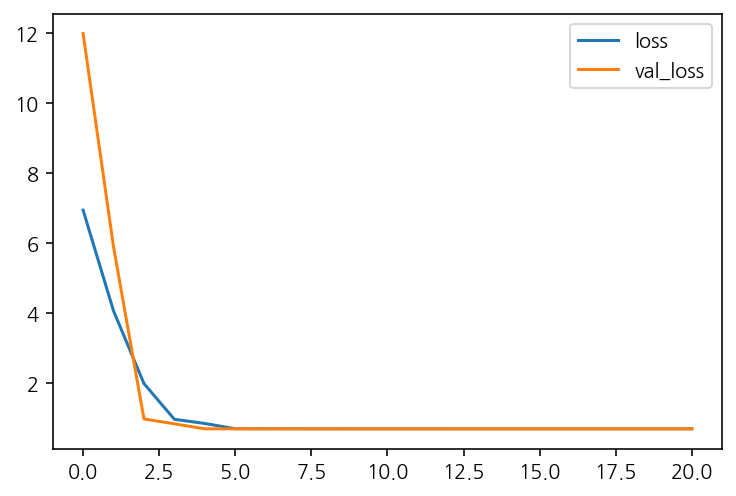

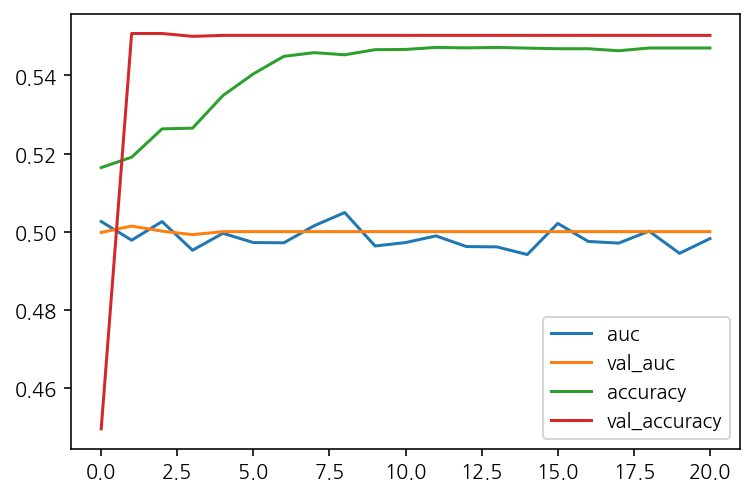

In [29]:
# loss, accuracy 값 시각화
df_hist[["loss", "val_loss"]].plot()

temp = []
for i in metrics:
    i = i.lower()
    temp.append(i)
    temp.append(f"val_{i}")
df_hist[temp].plot()

In [30]:
score = float(df_hist[metrics[0].lower()][-1:])
score = f"{metrics[0]}-{score:.4f}"
print(score)

AUC-0.4982


## 예측

In [31]:
y_pred = model.predict(X_test)
y_pred.shape

356/356 [==============================] - 1s 1ms/step


(11383, 1)

## 제출

In [32]:
submission["voted"] = y_pred.astype(np.int8)

In [33]:
# 되돌리기
# submission["voted"] = submission["voted"].map(lambda x:x+1)

In [34]:
file_name = f"submit_{score}.csv"
file = f"{data_path}/{file_name}"
submission.to_csv(file)
display(pd.read_csv(file, index_col=0).head(5))
print(file_name)

,voted
index,
0,0
1,0
2,0
3,0
4,0


submit_AUC-0.4982.csv
